Original notebook: <https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset>

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's



## Practical task

1. Apply Lasso or LARS regression to full feature dataset `x_full_scaled`. <https://stats.stackexchange.com/questions/4663/least-angle-regression-vs-lasso>
1. Compare accuracy via MSE to the regressions with preliminary selected variables (Linear, Ridge, Polynomial).
2. Compare selected features for selection regressions (Lasso, LARS) with preliminary selected variable list.
2. Calculate feature importance for Gradient Boosting.
    1. Plot feature importance.
    2. Compare feature importance order with preliminary selected variable list.

## Additional tasks
1. For Lasso, LARS regressions.
3. Compare regression coefficients with correlation coeffcients. (They both could be treated as feature selection in particular cases).
4. Perform regression modelling with different type of scaler: StandardScaler. Comare results.
2. For Gradient Boosting.
3. Apply Gradient Boosting to non-scaled dataset without preliminary feature selection. Compare MSE accuracy and feature importance to the scaled and preliminary selected case.
3. For both groups of methods.
1. Use different accuracy metric. Choose here (Regression section): <https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values>. Compare model ranking and feature importance with MSE metric.
2. Compare correlations for transformed features with correlations of original features.
3. Solve the `DIS` variable question. Leave just two most important varibles and apply regressions (parametric) and dicision tree to the rtuncated feature list. Compare results.
1. Add Gradient Boosting to the comparison.

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and EDA

In [3]:
# data = pd.read_csv("archive.zip")
# data - bad delimiter

In [3]:
#Let load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS',
                'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B',
                'LSTAT', 'MEDV']

data = pd.read_csv("archive.zip", header=None, delimiter="\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
# Dimension of the dataset
np.shape(data)

(506, 14)

In [8]:
# Let's summarize the data to see the distribution of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From get-go,  two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)  with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

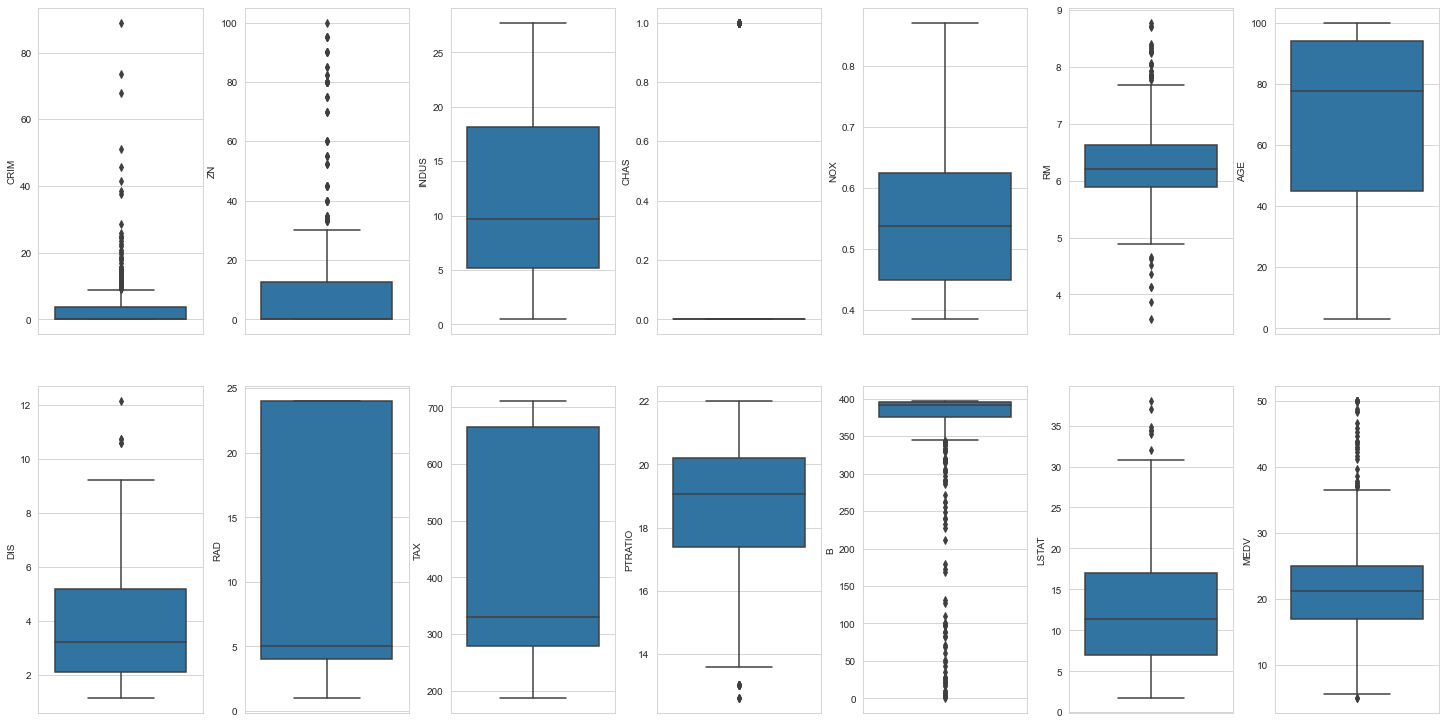

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
fig.patch.set_facecolor('xkcd:white')

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [10]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [5]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


Let's see how these features plus MEDV distributions looks like

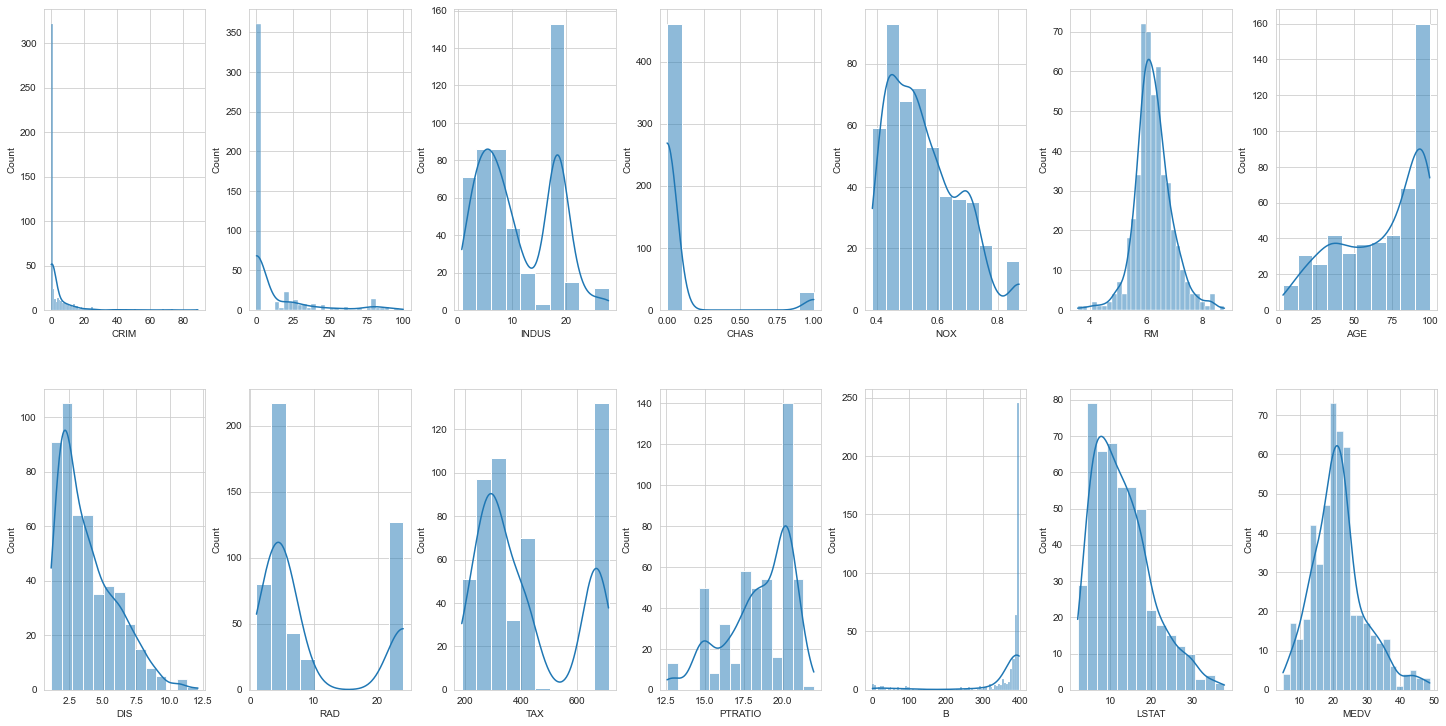

In [25]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
fig.patch.set_facecolor('xkcd:white')

<AxesSubplot:xlabel='TAX', ylabel='Count'>

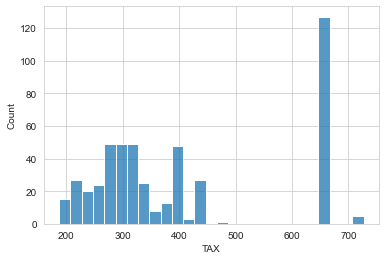

In [13]:
sns.histplot(data["TAX"], binwidth=20)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise  correlation on data.

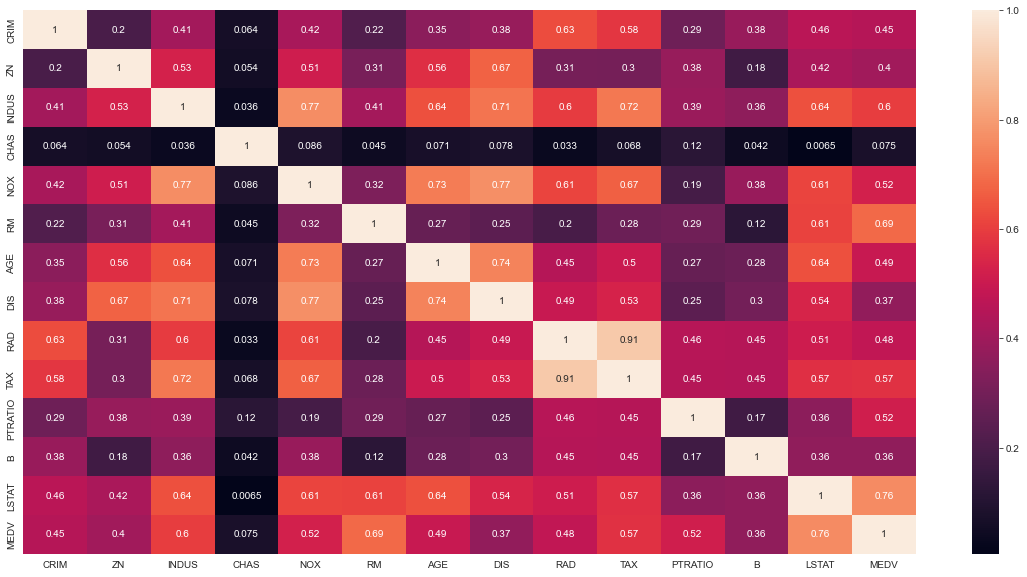

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True)
fig.patch.set_facecolor('xkcd:white')

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

In [6]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

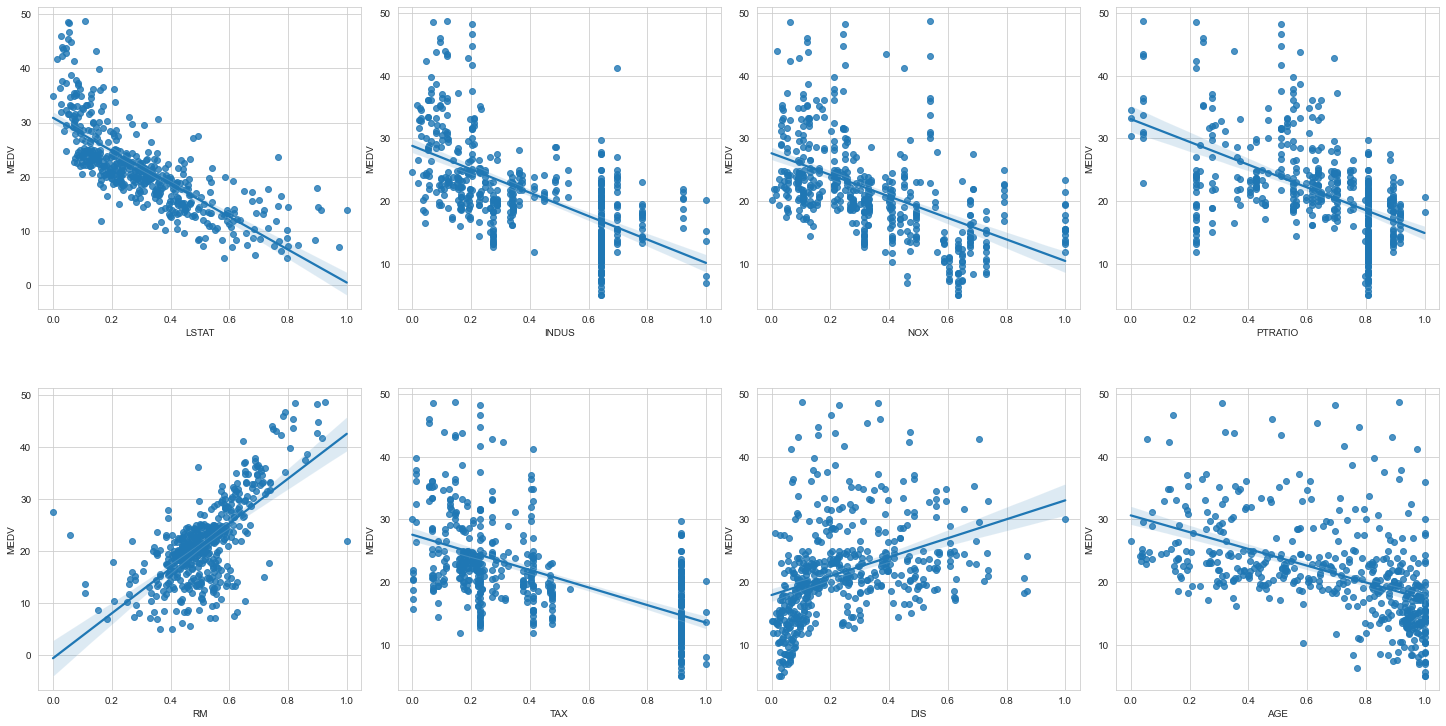

In [11]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = MinMaxScaler()

x = data.loc[:, column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
fig.patch.set_facecolor('xkcd:white')

So with this analysis, we may try to predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

# Feature things and models training

In [90]:
from sklearn.model_selection import KFold

In [91]:
kf = KFold(n_splits=10)

## Linear models

In [12]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [15]:
models = [linear_model.LinearRegression(),
          linear_model.Ridge(),
          linear_model.Lasso(),
          linear_model.Lars()
          ]
scalers = [None, StandardScaler(), MinMaxScaler()]

accuracy_results = pd.DataFrame(
    columns=['feature_set', 'model', 'scaler', 'neg_MSE', 'variance']
)

In [17]:
# with pre-selected features

In [8]:
x = data.loc[:, column_sels]
y = data['MEDV']

In [9]:
y_log = np.log1p(y)
x_log = x
for col in x_log.columns:
    if np.abs(x_log[col].skew()) > 0.3:
        x_log[col] = np.log1p(x_log[col])

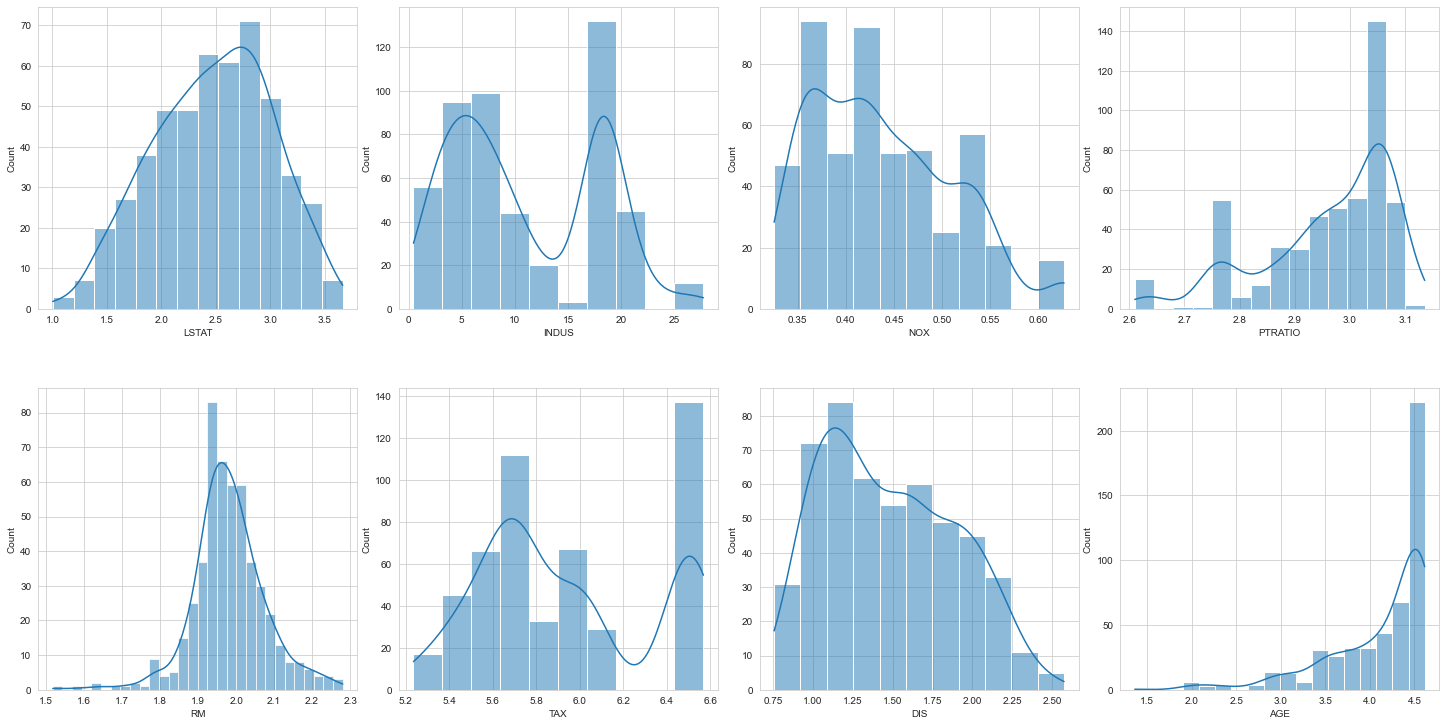

In [10]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in x_log.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
fig.patch.set_facecolor('xkcd:white')

In [64]:
x.columns

Index(['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'], dtype='object')

In [65]:
for m in models:
    for s in scalers:
        model = make_pipeline(s, m)
        scores = cross_val_score(model, x, y_log, cv=kf, scoring='neg_mean_squared_error')
        nMSE = round(scores.mean(), 4)
        var = round(scores.std(), 4)
        accuracy_results.loc[len(accuracy_results)] = ['manually_preselected', m, s, nMSE, var]

In [38]:
# but th scale of y is very different so we could not just compare this two scores. So how to measure the benefits of this log transformation?

In [68]:
# full x

In [16]:
x_full = data[data.columns[:-1]]

In [92]:
for col in x_full.columns:
    if np.abs(x_full[col].skew()) > 0.3:
        x_full[col] = np.log1p(x_full[col])

C:\Users\allk\AppData\Local\Temp/ipykernel_1236/4145010206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_full[col] = np.log1p(x_full[col])


In [73]:
for m in models:
    for s in scalers:
        model = make_pipeline(s, m)
        scores = cross_val_score(model, x_full, y_log, cv=kf, scoring='neg_mean_squared_error')
        nMSE = round(scores.mean(), 4)
        var = round(scores.std(), 4)
        accuracy_results.loc[len(accuracy_results)] = ['all', m, s, nMSE, var]

In [77]:
accuracy_results.sort_values(by='neg_MSE', ascending=False)

,feature_set,model,scaler,neg_MSE,variance
17,all,Ridge(),MinMaxScaler(),-0.0382,0.0413
15,all,Ridge(),None,-0.0390,0.0408
16,all,Ridge(),StandardScaler(),-0.0393,0.0426
12,all,LinearRegression(),None,-0.0394,0.0425
14,all,LinearRegression(),MinMaxScaler(),-0.0394,0.0425
13,all,LinearRegression(),StandardScaler(),-0.0394,0.0425
5,manually_preselected,Ridge(),MinMaxScaler(),-0.0405,0.0414
4,manually_preselected,Ridge(),StandardScaler(),-0.0412,0.0416
11,manually_preselected,Lars(),MinMaxScaler(),-0.0413,0.0416
1,manually_preselected,LinearRegression(),StandardScaler(),-0.0413,0.0416


In [139]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
# poli regressions
for degree in range(2, 5):
    for s in scalers:
        model = make_pipeline(s, PolynomialFeatures(degree=degree), linear_model.Ridge())
        scores = cross_val_score(model, x_full, y, cv=kf, scoring='neg_mean_squared_error')
        nMSE = round(scores.mean(), 4)
        var = round(scores.std(), 4)
        # print(nMSE,var)
        # print(make_pipeline(s, PolynomialFeatures(degree=degree), linear_model.Ridge()))
        accuracy_results.loc[len(accuracy_results)] = ['all', 'Polinomial_' + str(degree), s, nMSE, var]

-0.0726 0.0884
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])
-0.0299 0.0315
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])
-4.4788 13.1794
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])
-0.0293 0.0315
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])
-66.0357 197.0005
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('ridge', Ridge())])
-0.0317 0.0364
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
     

In [98]:
accuracy_results.dtypes

feature_set     object
model           object
scaler          object
neg_MSE        float64
variance       float64
dtype: object

In [72]:
# about skewness
# let's try the Poli d=3 without removing skewness
model = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_log, y_log, cv=kf, scoring='neg_mean_squared_error')
nMSE = round(scores.mean(), 4)
var = round(scores.std(), 4)
print('Log: ', nMSE, var)

model = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
nMSE = round(scores.mean(), 4)
var = round(scores.std(), 4)
print('Without log: ', nMSE, var)

Log:  -0.0316 0.0268
Without log:  -12.1763 6.8622


In [99]:
accuracy_results.to_pickle('linear_accuracies')

In [22]:
accuracy_results = pd.read_pickle('linear_accuracies')

In [39]:
accuracy_results.sort_values(by='neg_MSE', ascending=False)

,feature_set,model,scaler,neg_MSE,variance
29,all,Polinomial_3,MinMaxScaler(),-2.930000e-02,3.150000e-02
26,all,Polinomial_2,MinMaxScaler(),-2.990000e-02,3.150000e-02
32,all,Polinomial_4,MinMaxScaler(),-3.170000e-02,3.640000e-02
35,all,Polinomial_5,MinMaxScaler(),-3.560000e-02,4.540000e-02
24,all,Polinomial_2,None,-3.760000e-02,4.070000e-02
17,all,Ridge(),MinMaxScaler(),-3.820000e-02,4.130000e-02
15,all,Ridge(),None,-3.900000e-02,4.080000e-02
16,all,Ridge(),StandardScaler(),-3.930000e-02,4.260000e-02
13,all,LinearRegression(),StandardScaler(),-3.940000e-02,4.250000e-02
14,all,LinearRegression(),MinMaxScaler(),-3.940000e-02,4.250000e-02


In [68]:
# add poli for pre-selected vars
for degree in range(5, 11):
    for s in scalers:
        model = make_pipeline(s, PolynomialFeatures(degree=degree), linear_model.Ridge())
        scores = cross_val_score(model, x_log, y_log, cv=kf, scoring='neg_mean_squared_error')
        nMSE = round(scores.mean(), 4)
        var = round(scores.std(), 4)
        # print(nMSE,var)
        # print(make_pipeline(s, PolynomialFeatures(degree=degree), linear_model.Ridge()))
        accuracy_results.loc[len(accuracy_results)] = ['manually_preselected', 'Polinomial_' + str(degree), s, nMSE,
                                                       var]

C:\Users\allk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.30499e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\allk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.38535e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\allk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.27888e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\allk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.32597e-18): result may not be accurate.
  dual_coef = linalg.solve

In [69]:
accuracy_results['model'] = accuracy_results['model'].astype(str)
accuracy_results['scaler'] = accuracy_results['scaler'].astype(str)

In [67]:
accuracy_results.dtypes

feature_set     object
model           object
scaler          object
neg_MSE        float64
variance       float64
dtype: object

In [62]:
accuracy_results['neg_MSE'] = accuracy_results['neg_MSE'].round(4)

In [64]:
accuracy_results['variance'] = accuracy_results['variance'].round(4)

In [74]:
accuracy_results.sort_values(by=['model', 'scaler'])

,feature_set,model,scaler,neg_MSE,variance
11,manually_preselected,Lars(),MinMaxScaler(),-0.0413,0.0416
23,all,Lars(),MinMaxScaler(),-0.0545,0.0858
9,manually_preselected,Lars(),None,-0.0413,0.0416
21,all,Lars(),None,-0.0545,0.0858
10,manually_preselected,Lars(),StandardScaler(),-0.0413,0.0416
...,...,...,...,...,...
17,all,Ridge(),MinMaxScaler(),-0.0382,0.0413
3,manually_preselected,Ridge(),None,-0.0416,0.0403
15,all,Ridge(),None,-0.0390,0.0408
4,manually_preselected,Ridge(),StandardScaler(),-0.0412,0.0416


In [66]:
accuracy_results.to_pickle('linear_accuracies')

In [98]:
accuracy_results = pd.read_pickle('linear_accuracies')
accuracy_results

,feature_set,model,scaler,neg_MSE,variance
0,manually_preselected,LinearRegression(),None,-4.130000e-02,4.160000e-02
1,manually_preselected,LinearRegression(),StandardScaler(),-4.130000e-02,4.160000e-02
2,manually_preselected,LinearRegression(),MinMaxScaler(),-4.130000e-02,4.160000e-02
3,manually_preselected,Ridge(),None,-4.160000e-02,4.030000e-02
4,manually_preselected,Ridge(),StandardScaler(),-4.120000e-02,4.160000e-02
5,manually_preselected,Ridge(),MinMaxScaler(),-4.050000e-02,4.140000e-02
6,manually_preselected,Lasso(),None,-1.450000e-01,1.121000e-01
7,manually_preselected,Lasso(),StandardScaler(),-1.450000e-01,1.121000e-01
8,manually_preselected,Lasso(),MinMaxScaler(),-1.450000e-01,1.121000e-01
9,manually_preselected,Lars(),None,-4.130000e-02,4.160000e-02


### Coeficients comparisson

In [77]:
# as I failed with lasso. let's try just Lars
accuracy_results[accuracy_results['model'] == 'Lasso()']

,feature_set,model,scaler,neg_MSE,variance
6,manually_preselected,Lasso(),None,-0.145,0.1121
7,manually_preselected,Lasso(),StandardScaler(),-0.145,0.1121
8,manually_preselected,Lasso(),MinMaxScaler(),-0.145,0.1121
18,all,Lasso(),None,-0.145,0.1121
19,all,Lasso(),StandardScaler(),-0.145,0.1121
20,all,Lasso(),MinMaxScaler(),-0.145,0.1121


In [20]:
lasso_model = make_pipeline(StandardScaler(), linear_model.Lasso())
lasso_model.fit(x_full, y_log)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [22]:
lasso_model.named_steps['lasso'].coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [78]:
accuracy_results[accuracy_results['model'] == 'Lars()']

,feature_set,model,scaler,neg_MSE,variance
9,manually_preselected,Lars(),None,-0.0413,0.0416
10,manually_preselected,Lars(),StandardScaler(),-0.0413,0.0416
11,manually_preselected,Lars(),MinMaxScaler(),-0.0413,0.0416
21,all,Lars(),None,-0.0545,0.0858
22,all,Lars(),StandardScaler(),-0.0545,0.0858
23,all,Lars(),MinMaxScaler(),-0.0545,0.0858


In [18]:
lars_model = make_pipeline(StandardScaler(), linear_model.Lars())
lars_model.fit(x_full, y_log)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lars', Lars())])

In [19]:
lars_model.named_steps['lars'].coef_

array([-0.14104086, -0.0041521 ,  0.00995091,  0.02161287, -0.07347111,
        0.03819748,  0.01754719, -0.09808179,  0.13073838, -0.05796472,
       -0.07283874,  0.02994724, -0.23173396])

In [23]:
lars_scalled_coef = pd.DataFrame(index=x_full.columns, columns=['lars_scaled_coef'],
                                 data=lars_model.named_steps['lars'].coef_)

In [24]:
lars_non_scaled_model = linear_model.Lars()
lars_non_scaled_model.fit(x_full, y_log)

Lars()

In [25]:
lars_coef = pd.DataFrame(index=x_full.columns, columns=['lars_coef'], data=lars_non_scaled_model.coef_)

In [26]:
lars_coef['lars_coef'] = lars_coef['lars_coef'].abs()

In [27]:
# correlation coef
cor_coef = data.loc[:, x_full.columns].corrwith(data["MEDV"]).abs().to_frame()

In [28]:
all_coef = lars_coef.join(cor_coef)

In [29]:
all_coef.rename(columns={0: 'corr_coef'}, inplace=True)

In [30]:
all_coef = all_coef.join(lars_scalled_coef)

In [31]:
all_coef['lars_scaled_coef'] = all_coef['lars_scaled_coef'].abs()

In [33]:
for col in all_coef.columns:
    all_coef['rank_' + col] = all_coef[col].rank(method='max', ascending=False)

In [34]:
all_coef  # for feature selection

,lars_coef,corr_coef,lars_scaled_coef,rank_lars_coef,rank_corr_coef,rank_lars_scaled_coef
CRIM,0.138043,0.388305,0.141041,8.0,7.0,2.0
ZN,0.002564,0.360445,0.004152,12.0,10.0,13.0
INDUS,0.001452,0.483725,0.009951,13.0,4.0,12.0
CHAS,0.122883,0.175260,0.021613,9.0,13.0,10.0
NOX,1.008173,0.427321,0.073471,1.0,6.0,5.0
RM,0.396223,0.695360,0.038197,4.0,2.0,8.0
AGE,0.029782,0.376955,0.017547,11.0,9.0,11.0
DIS,0.237497,0.249929,0.098082,5.0,12.0,4.0
RAD,0.174064,0.381626,0.130738,6.0,8.0,3.0
TAX,0.146766,0.468536,0.057965,7.0,5.0,7.0


In [42]:
columns_lars = list(all_coef.nlargest(8, 'lars_scaled_coef').index)

In [43]:
columns_lars

['LSTAT', 'CRIM', 'RAD', 'DIS', 'NOX', 'PTRATIO', 'TAX', 'RM']

In [39]:
column_sels

['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

In [44]:
# just add a bit of set magic

# in both
set(column_sels).intersection(columns_lars)

{'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RM', 'TAX'}

In [45]:
# was picked manually but low lars weight
[col for col in column_sels if col not in columns_lars]

['INDUS', 'AGE']

In [46]:
# should've been added according to lars weights
[col for col in columns_lars if col not in column_sels]

['CRIM', 'RAD']

In [36]:
all_coef.to_pickle('all_coef')

## Let's try some non prametric regression techniques: SVR with kernal rbf, DecisionTreeRegressor, KNeighborsRegressor etc.

In [48]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
# i was just to lazy to perform parameter search by myself
non_lin_models = [SVR(kernel='rbf', C=1e3, gamma=0.1),
                  DecisionTreeRegressor(max_depth=5),
                  KNeighborsRegressor(n_neighbors=7),
                  GradientBoostingRegressor(alpha=0.9,
                                            learning_rate=0.05,
                                            max_depth=2,
                                            min_samples_leaf=5,
                                            min_samples_split=2,
                                            n_estimators=100,
                                            random_state=30)
                  ]
scalers = [None, StandardScaler(), MinMaxScaler()]

non_lin_results = pd.DataFrame(
    columns=['feature_set', 'model', 'scaler', 'neg_MSE', 'variance']
)

In [95]:
# all features
for m in non_lin_models:
    for s in scalers:
        model = make_pipeline(s, m)
        scores = cross_val_score(model, x_full, y_log, cv=kf, scoring='neg_mean_squared_error')
        nMSE = round(scores.mean(), 4)
        var = round(scores.std(), 4)

        non_lin_results.loc[len(non_lin_results)] = ['all', str(model.steps[1][0]), str(s), nMSE, var]

In [96]:
# pre-selected features
for m in non_lin_models:
    for s in scalers:
        model = make_pipeline(s, m)
        scores = cross_val_score(model, x_log, y_log, cv=kf, scoring='neg_mean_squared_error')
        nMSE = round(scores.mean(), 4)
        var = round(scores.std(), 4)

        non_lin_results.loc[len(non_lin_results)] = ['manually_preselected', str(model.steps[1][0]), str(s), nMSE, var]

In [97]:
non_lin_results.sort_values(by=['model','scaler'])

,feature_set,model,scaler,neg_MSE,variance
5,all,decisiontreeregressor,MinMaxScaler(),-0.0661,0.0547
17,manually_preselected,decisiontreeregressor,MinMaxScaler(),-0.0619,0.0508
3,all,decisiontreeregressor,None,-0.0560,0.0554
15,manually_preselected,decisiontreeregressor,None,-0.0623,0.0507
4,all,decisiontreeregressor,StandardScaler(),-0.0641,0.0558
16,manually_preselected,decisiontreeregressor,StandardScaler(),-0.0567,0.0514
11,all,gradientboostingregressor,MinMaxScaler(),-0.0351,0.0340
23,manually_preselected,gradientboostingregressor,MinMaxScaler(),-0.0330,0.0328
9,all,gradientboostingregressor,None,-0.0351,0.0340
21,manually_preselected,gradientboostingregressor,None,-0.0330,0.0328


In [178]:
non_lin_results.to_feather('non_lin_results')

In [37]:
non_lin_results = pd.read_feather('non_lin_results')

In [51]:
from sklearn.metrics import mean_squared_error

In [54]:
# check feature importance for dec tree
# just without any scaling
desc_tr = DecisionTreeRegressor(max_depth=5)
desc_tr.fit(x_full, y_log)

DecisionTreeRegressor(max_depth=5)

In [56]:
tree_feat_importance = pd.DataFrame(index=x_full.columns, columns=['tree_feat_importance'],
                                    data=desc_tr.feature_importances_)

In [57]:
tree_feat_importance

,tree_feat_importance
CRIM,0.095913
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
NOX,0.031986
RM,0.229933
AGE,0.018004
DIS,0.040917
RAD,0.000000
TAX,0.024354


In [118]:
all_coef = all_coef.join(tree_feat_importance)

In [58]:
# scaled
desc_tr = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth=5))
desc_tr.fit(x_full, y_log)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=5))])

In [60]:
sc_tree_feat_importance = pd.DataFrame(index=x_full.columns, columns=['sc_tree_feat_importance'],
                                       data=desc_tr.named_steps['decisiontreeregressor'].feature_importances_)

In [61]:
sc_tree_feat_importance  # So do we really need scalling for tree models?

,sc_tree_feat_importance
CRIM,0.108443
ZN,0.000000
INDUS,0.009590
CHAS,0.000000
NOX,0.033102
RM,0.234996
AGE,0.016888
DIS,0.035543
RAD,0.000000
TAX,0.007609


Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [62]:
# feature importance for GradBoosting
gbr = make_pipeline(MinMaxScaler(),
                    GradientBoostingRegressor(alpha=0.9,
                                              learning_rate=0.05,
                                              max_depth=2,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              n_estimators=100,
                                              random_state=30))
gbr.fit(x_full, y_log)
sc_gbr_feat_importance = pd.DataFrame(index=x_full.columns, columns=['sc_gbr_feat_importance'],
                                       data=gbr.named_steps['gradientboostingregressor'].feature_importances_)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=2,
                                           min_samples_leaf=5,
                                           random_state=30))])

<AxesSubplot:>

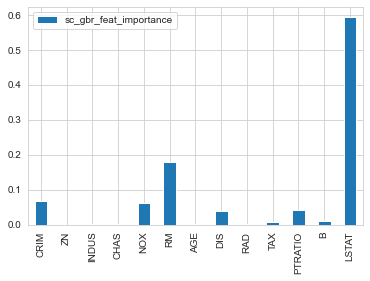

In [66]:
sc_gbr_feat_importance.plot(kind='bar')

In [68]:
sc_gbr_feat_importance.sort_values('sc_gbr_feat_importance', ascending=False)

,sc_gbr_feat_importance
LSTAT,0.593071
RM,0.178835
CRIM,0.067475
NOX,0.061867
PTRATIO,0.041267
DIS,0.038676
B,0.009056
TAX,0.005984
AGE,0.001703
INDUS,0.000897


In [69]:
column_sels

['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

In [73]:
non_lin_results[non_lin_results['model']=='gradientboostingregressor']

,feature_set,model,scaler,neg_MSE,variance
9,all,gradientboostingregressor,None,-0.0311,0.0261
10,all,gradientboostingregressor,StandardScaler(),-0.0311,0.0261
11,all,gradientboostingregressor,MinMaxScaler(),-0.0311,0.0261
21,manually_preselected,gradientboostingregressor,None,-0.0289,0.0223
22,manually_preselected,gradientboostingregressor,StandardScaler(),-0.0289,0.0223
23,manually_preselected,gradientboostingregressor,MinMaxScaler(),-0.0289,0.0223


In [75]:
gbr_ns = make_pipeline(
                    GradientBoostingRegressor(alpha=0.9,
                                              learning_rate=0.05,
                                              max_depth=2,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              n_estimators=100,
                                              random_state=30))
gbr_ns.fit(x_full, y_log)
gbr_feat_importance = pd.DataFrame(index=x_full.columns, columns=['gbr_feat_importance'],
                                      data=gbr_ns.named_steps['gradientboostingregressor'].feature_importances_)

In [77]:
gbr_feat_importance # scaling got no sense

,gbr_feat_importance
CRIM,0.067475
ZN,0.000000
INDUS,0.000897
CHAS,0.000324
NOX,0.061867
RM,0.178835
AGE,0.001703
DIS,0.038676
RAD,0.000843
TAX,0.005984


In [119]:
all_coef = all_coef.join(gbr_feat_importance)

In [79]:
gbr_pre = make_pipeline(
    GradientBoostingRegressor(alpha=0.9,
                              learning_rate=0.05,
                              max_depth=2,
                              min_samples_leaf=5,
                              min_samples_split=2,
                              n_estimators=100,
                              random_state=30))
gbr_pre.fit(x_log, y_log)
gbr_pre_feat_importance = pd.DataFrame(index=x_log.columns, columns=['gbr_pre_feat_importance'],
                                   data=gbr_pre.named_steps['gradientboostingregressor'].feature_importances_)

In [80]:
gbr_pre_feat_importance

,gbr_pre_feat_importance
LSTAT,0.613585
INDUS,0.000364
NOX,0.080954
PTRATIO,0.050988
RM,0.184413
TAX,0.022034
DIS,0.047083
AGE,0.000579


In [81]:
print('Full: ', mean_squared_error(y_log, gbr_ns.predict(x_full)))
print('Preselected: ', mean_squared_error(y_log, gbr_pre.predict(x_log)))

Full:  0.015124624799671298
Preselected:  0.01635664511430628


In [ ]:
# training error is smaller for full-featured set, but in cross-val score the pre-selected one is slighly better

In [83]:
# corr of data VS transform data

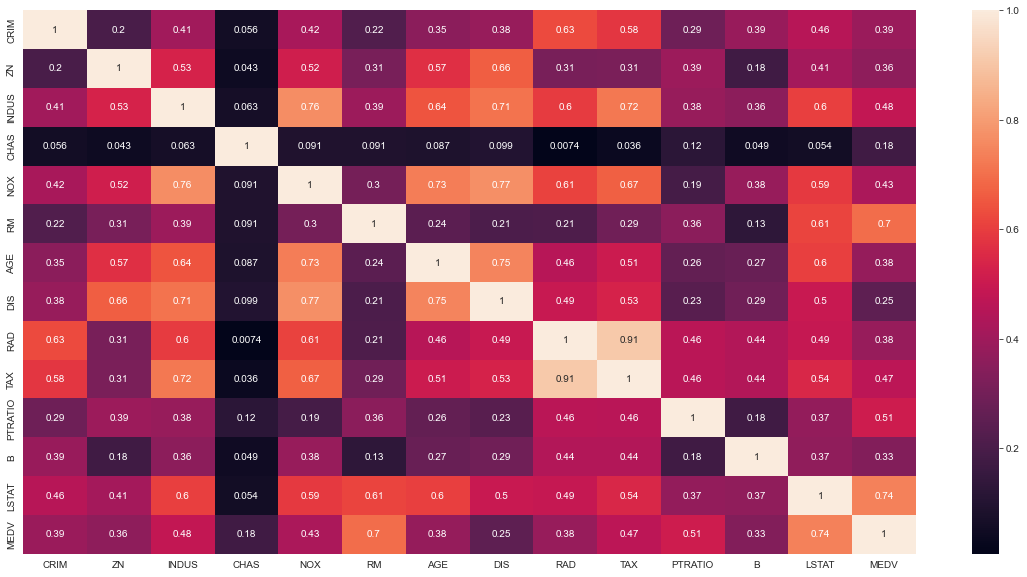

In [84]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True)
fig.patch.set_facecolor('xkcd:white')

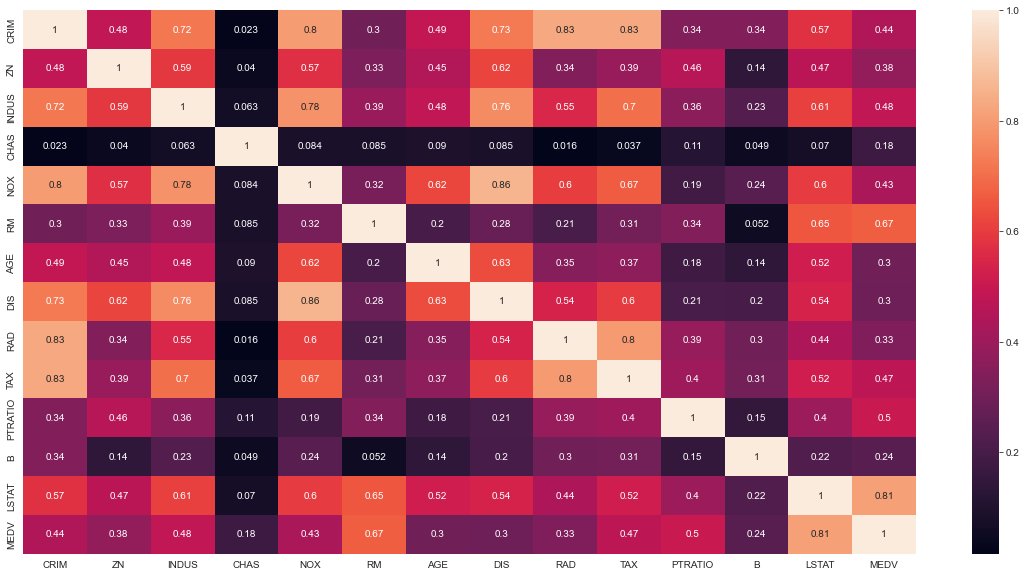

In [101]:
plt.figure(figsize=(20, 10))
sns.heatmap(x_full.join(y).corr().abs(), annot=True)
fig.patch.set_facecolor('xkcd:white')

In [111]:
# choose less models for both MSE and R2 metrics
scoring = {
           # 'explained_variance': 'explained_variance',
           'neg_mean_squared_error': 'neg_mean_squared_error',
           # 'neg_median_absolute_error': 'neg_median_absolute_error',
           'r2': 'r2',
           # 'neg_mean_poisson_deviance': 'neg_mean_poisson_deviance',
           # 'neg_mean_gamma_deviance':'neg_mean_gamma_deviance'
           }

In [112]:
from sklearn.model_selection import cross_validate

In [113]:
model = make_pipeline(MinMaxScaler(), linear_model.LinearRegression())
scores = cross_validate(model, x_log, y_log, cv=kf, scoring=scoring)

In [114]:
scores

{'fit_time': array([0.00913477, 0.00798631, 0.0060041 , 0.00805187, 0.00784349,
        0.00524449, 0.00732923, 0.00575662, 0.00570202, 0.00635695]),
 'score_time': array([0.00498605, 0.00521135, 0.00279212, 0.0039928 , 0.00299191,
        0.00299096, 0.00299215, 0.00199389, 0.00299215, 0.00398397]),
 'test_neg_mean_squared_error': array([-0.01627644, -0.01589514, -0.01198839, -0.02365392, -0.03574267,
        -0.02398648, -0.01793716, -0.20377161, -0.06745182, -0.06631511]),
 'test_r2': array([ 0.75491959,  0.53225865,  0.43058875,  0.75725587,  0.454024  ,
         0.64079123,  0.34186289,  0.33180253,  0.16403564, -0.03465233])}

In [157]:
# select only 2 features
all_coef = all_coef[[c for c in all_coef.columns if not c.startswith('rank_')]]

In [159]:
all_coef.sum(axis=1)

CRIM       0.830776
ZN         0.367162
INDUS      0.496025
CHAS       0.320080
NOX        1.602818
RM         1.538548
AGE        0.443991
DIS        0.665100
RAD        0.687272
TAX        0.703605
PTRATIO    1.241321
B          0.418625
LSTAT      2.545479
dtype: float64

In [123]:
for col in all_coef.columns:
    all_coef['rank_' + col] = all_coef[col].rank(method='max', ascending=False)

In [128]:
all_coef_ranks = all_coef[[c for c in all_coef.columns if c.startswith('rank_')]]

In [129]:
all_coef_ranks

,rank_lars_coef,rank_corr_coef,rank_lars_scaled_coef,rank_tree_feat_importance,rank_gbr_feat_importance
CRIM,8.0,7.0,2.0,3.0,3.0
ZN,12.0,10.0,13.0,13.0,13.0
INDUS,13.0,4.0,12.0,13.0,10.0
CHAS,9.0,13.0,10.0,13.0,12.0
NOX,1.0,6.0,5.0,5.0,4.0
RM,4.0,2.0,8.0,2.0,2.0
AGE,11.0,9.0,11.0,7.0,9.0
DIS,5.0,12.0,4.0,4.0,6.0
RAD,6.0,8.0,3.0,13.0,11.0
TAX,7.0,5.0,7.0,6.0,8.0


In [131]:
all_coef_ranks['rank_sum'] = all_coef_ranks.sum(axis=1)

C:\Users\allk\AppData\Local\Temp/ipykernel_1236/136453096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_coef_ranks['rank_sum'] = all_coef_ranks.sum(axis=1)


In [133]:
all_coef_ranks.nsmallest(2, 'rank_sum')

,rank_lars_coef,rank_corr_coef,rank_lars_scaled_coef,rank_tree_feat_importance,rank_gbr_feat_importance,rank_sum
LSTAT,3.0,1.0,1.0,1.0,1.0,7.0
RM,4.0,2.0,8.0,2.0,2.0,18.0


In [172]:
most_imp = all_coef_ranks.nsmallest(6, 'rank_sum').index.to_list()

In [173]:
most_imp

['LSTAT', 'RM', 'NOX', 'CRIM', 'PTRATIO', 'DIS']

In [174]:
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
}

In [180]:
model_poli_reg = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=3), linear_model.Ridge())
scores_poli_reg = cross_validate(model_poli_reg, x_full[most_imp], y_log, cv=kf, scoring=scoring)

In [176]:
scores_poli_reg

{'fit_time': array([0.00720406, 0.004987  , 0.00504923, 0.00600052, 0.00677443,
        0.00599718, 0.00770783, 0.00771379, 0.00598693, 0.00498652]),
 'score_time': array([0.00477052, 0.00299144, 0.00299144, 0.00199008, 0.00298929,
        0.00299096, 0.00299168, 0.0019958 , 0.00509334, 0.00302148]),
 'test_neg_mean_squared_error': array([-0.01631895, -0.00993088, -0.059131  , -0.02706002, -0.03267466,
        -0.03211826, -0.02623157, -0.15785236, -0.06877364, -0.03624119]),
 'test_r2': array([ 0.75427949,  0.70776699, -1.80853973,  0.72230131,  0.50088843,
         0.51901413,  0.03753037,  0.48237858,  0.14765361,  0.43456284])}

In [179]:
tree_model = DecisionTreeRegressor(max_depth=5)
scores_tree = cross_validate(tree_model, x_full[most_imp], y_log, cv=kf, scoring=scoring)
scores_tree

{'fit_time': array([0.00945878, 0.00726151, 0.00663257, 0.00602794, 0.00700355,
        0.00698113, 0.00572586, 0.00527596, 0.00712609, 0.00742269]),
 'score_time': array([0.00510716, 0.00350809, 0.00399423, 0.0047574 , 0.00438499,
        0.00498629, 0.0048759 , 0.00298643, 0.0042696 , 0.00552893]),
 'test_neg_mean_squared_error': array([-0.03966034, -0.00824473, -0.0613091 , -0.07128873, -0.0224053 ,
        -0.0502627 , -0.01815512, -0.18710764, -0.09713713, -0.07237742]),
 'test_r2': array([ 0.40281947,  0.75738496, -1.91199298,  0.26841204,  0.6577548 ,
         0.24729258,  0.33386538,  0.38644617, -0.2038693 , -0.12923691])}

In [181]:
gb_model = GradientBoostingRegressor(alpha=0.9,
                                     learning_rate=0.05,
                                     max_depth=2,
                                     min_samples_leaf=5,
                                     min_samples_split=2,
                                     n_estimators=100,
                                     random_state=30)
scores_gb = cross_validate(gb_model, x_full[most_imp], y_log, cv=kf, scoring=scoring)
scores_gb

{'fit_time': array([0.12504435, 0.15503669, 0.2267158 , 0.19854403, 0.15256548,
        0.1464963 , 0.16310072, 0.18645072, 0.18121147, 0.14881039]),
 'score_time': array([0.00417542, 0.00400519, 0.0050559 , 0.00668502, 0.00485682,
        0.00835657, 0.00594425, 0.00559759, 0.00274444, 0.00501561]),
 'test_neg_mean_squared_error': array([-0.02066374, -0.00644819, -0.0165621 , -0.02279978, -0.019626  ,
        -0.01478152, -0.01662996, -0.11346286, -0.05593969, -0.04142241]),
 'test_r2': array([0.68885833, 0.810251  , 0.21335126, 0.76602128, 0.70020918,
        0.77863978, 0.38982567, 0.62793838, 0.30671121, 0.35372513])}

In [182]:
scores_map = pd.DataFrame(columns=['poli_3_reg',
                                   'decision_tree',
                                   'gbr'])

In [183]:
scores_map['poli_3_reg'] = scores_poli_reg['test_neg_mean_squared_error']
scores_map['decision_tree'] = scores_tree['test_neg_mean_squared_error']
scores_map['gbr'] = scores_gb['test_neg_mean_squared_error']

In [184]:
scores_map

,poli_3_reg,decision_tree,gbr
0,-0.018851,-0.039660,-0.020664
1,-0.010074,-0.008245,-0.006448
2,-0.018079,-0.061309,-0.016562
3,-0.021021,-0.071289,-0.022800
4,-0.018899,-0.022405,-0.019626
5,-0.012485,-0.050263,-0.014782
6,-0.014952,-0.018155,-0.016630
7,-0.132706,-0.187108,-0.113463
8,-0.048771,-0.097137,-0.055940
9,-0.062134,-0.072377,-0.041422


<AxesSubplot:>

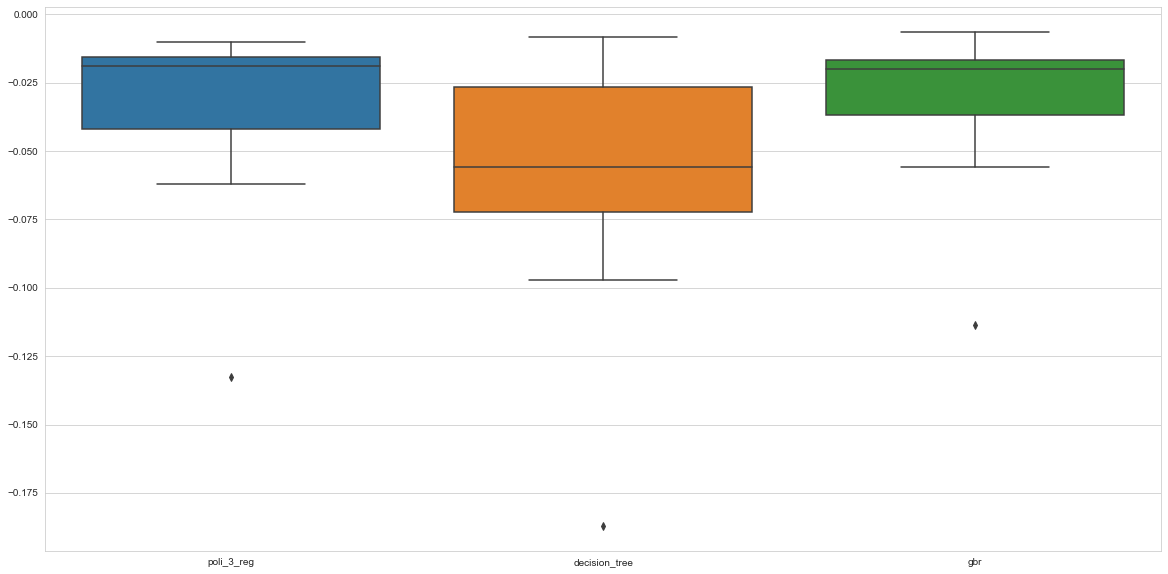

In [185]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

In [186]:
scores_map.agg(['mean', 'median', 'var'])

,poli_3_reg,decision_tree,gbr
mean,-0.035797,-0.062795,-0.032834
median,-0.018875,-0.055786,-0.020145
var,0.001444,0.002677,0.001009


In [ ]:
# for R2:
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a score of 0.0.